# Building Insulation

The decision on much it invest in insulating a building is determined by a tradeoff between the capital costs of insulation and the annual operating costs for heating and air conditioning. This notebook shows the formulation and solution of an optimization problem using conic programming.


## Bibliographic Notes

To the best of my knowledge, this problem is not well-known example in the mathematical optimization literature. There are a number of application papers with differing levels of detail. 

> Hasan, A. (1999). Optimizing insulation thickness for buildings using life cycle cost. Applied energy, 63(2), 115-124. https://www.sciencedirect.com/science/article/pii/S0306261999000239

> Kaynakli, O. (2012). A review of the economical and optimum thermal insulation thickness for building applications. Renewable and Sustainable Energy Reviews, 16(1), 415-425. https://www.sciencedirect.com/science/article/pii/S1364032111004163

> Nyers, J., Kajtar, L., Tomić, S., & Nyers, A. (2015). Investment-savings method for energy-economic optimization of external wall thermal insulation thickness. Energy and Buildings, 86, 268-274.  https://www.sciencedirect.com/science/article/pii/S0378778814008688

## A Simple Model

Consider a wall or surface separating conditioned interior space in a building at temperature $T_i$ from the external environment at temperature $T_o$. Heat conduction through the wall is given by

$$\dot{Q} = UA (T_i - T_o)$$

where $U$ is the overall heat transfer coefficient. For a surface constructed from up to $M$ layers of different insulating materials, the inverse of the overall heat transfer coefficient is a determined by a sum of serial thermal "resistances"

$$\frac{1}{U} = R_0 + \sum_{m=1}^M R_m$$

where $R_0$ is thermal resistance of wall or surface structural elements building. The thermal resistances of each layer is given by $R_m = \frac{x_m}{k_m}$ such that

$$\frac{1}{U} = R_0 + \sum_{m=1}^M \frac{x_m}{k_m}$$

where each material layer is characterized by a thickness $x_m$ and a thermal conductivity $k_m$.

We assume the annual energy costs are proportional to thermal conductivity $U$. The cost of installing a unit area of unit area of insulation is given by an affine expression

$$a_m + b_m x_m$$

The combined annualized costs are

$$\alpha U + \beta\sum_{m=1}^m (a_m y_m + b_m x_m)$$

where $\beta$ is a discount factor for the equivalent annualized cost of a capital investment in insulation. Binary variable $y_m$ is a binary variable indicates whether or not layer $m$ is included in the installation. The feasible values for $x_m$ are subject to constraints

$$\begin{align}
x_m & \leq Ty_m \\
\sum_{m=1}^M x_m & \leq T
\end{align}$$

where $T$ is an upper bound on wall thickness.


## Sample Data

| Material | k (W/mK) | a | b |
| :-- | :--:| :--: | :--: |
| Mineral Wool | 0.036 | 5.0 | 150.0
| Rigid Foam (low k) | 0.022 |
| Rigid Foam (high k) | 0.030 |

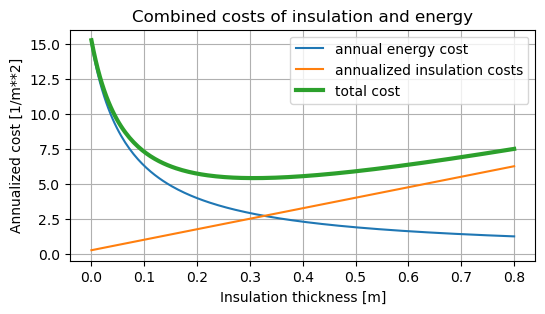

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# application parameters
alpha = 30       # $ K / W annualized cost per sq meter per W/sq m/K
beta = 0.05        # equivalent annual cost factor
R0 = 2.0          # Watts/K/m**2

# material properties
k = 0.036         # thermal conductivity as installed
a = 5.0           # installation cost per square meter
b = 150.0         # installed material cost per cubic meter

# plotting
x = np.linspace(0, 0.8, 201)

U = 1.0/(R0 + x/k)
c = (a + b*x)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x, alpha*U, label="annual energy cost")
ax.plot(x, beta*c, label="annualized insulation costs")
ax.plot(x, alpha*U + beta*c, label="total cost", lw=3)
ax.set_xlabel("Insulation thickness [m]")
ax.set_ylabel("Annualized cost [1/m**2]")
ax.set_title("Combined costs of insulation and energy")
ax.legend()
ax.grid(True)

## Mixed Integer Optimization


The economic objective is to minimize the combined annual energy operating expenses and capital cost of insulation. Let $\alpha$ be a coefficient for the proportional relationship of the overall heat transfer coefficient $U$ to the annual energy costs.  

$$\min \alpha U + \beta \sum_{m=1}^M (a_my_m + b_mx_m) $$

subject to constraints

$$
\begin{align}
R & = R_0 + \sum_{m=1}^M\frac{x_m}{k_m} \\
\sum_{m=1}^M x_m & \leq T \\
x_m & \geq 0 \\
y_m & \in \text{Binary} \\
x_m & \leq Ty_m \\
R U & \geq 1 \\
R, U & > 0
\end{align}
$$

where binary variables $y_m$ indicate whether layer $m$ is included in the insulation package, and $x_m$ is the thickness of layer $m$ if included.


## Formulation with a second order cone constraint
